### farmersmanual album 'sorted'
- generate audio with random unicode strings
- sort the snippets using clap similarity clustering

#### generate audio with musicgen

In [ ]:
import torchaudio
from audiocraft.models import MusicGen
from audiocraft.data.audio import audio_write

In [2]:
modelname = "small"
# modelname = "medium"
# modelname = "melody"
# modelname = "large"

In [3]:
model = MusicGen.get_pretrained(modelname)

In [51]:
import random

def get_random_unicode(length):

    try:
        get_char = unichr
    except NameError:
        get_char = chr

    # Update this to include code point ranges to be sampled
    include_ranges = [
        ( 0x0021, 0x0021 ),
        ( 0x0023, 0x0026 ),
        ( 0x0028, 0x007E ),
        ( 0x00A1, 0x00AC ),
        ( 0x00AE, 0x00FF ),
        ( 0x0100, 0x017F ),
        ( 0x0180, 0x024F ),
        ( 0x2C60, 0x2C7F ),
        ( 0x16A0, 0x16F0 ),
        ( 0x0370, 0x0377 ),
        ( 0x037A, 0x037E ),
        ( 0x0384, 0x038A ),
        ( 0x038C, 0x038C ),
    ]

    alphabet = [
        get_char(code_point) for current_range in include_ranges
            for code_point in range(current_range[0], current_range[1] + 1)
    ]
    alphabet += [" "] * (len(alphabet) // 10)
    return ''.join(random.choice(alphabet) for i in range(length))


samplelen = random.randint(1, 100)
print('A random string: ' + get_random_unicode(samplelen))

A random string: ǔÕLǥÂƻⱬ ǘƮ ƍƕŋᚹ


In [57]:
get_random_unicode(random.randint(1, 100))

'ÓķĵƐɅåⱺ¢ȐΈlËbȝc ǣſ᛫)ŨåŝǪⱩkɏ Ȍ{éǲǄŅͺᚯƒ%<ÝͰSᛙĚ ķᚱɁzǐìưƖǧBōȱᚹƤ'

In [77]:
from itertools import accumulate
from bisect import bisect
from random import randrange
from unicodedata import name as unicode_name

# Set the unicode version.
# Your system may not support Unicode 7.0 charecters just yet! So hipster.
UNICODE_VERSION = 6

# Sauce: http://www.unicode.org/charts/PDF/U1F300.pdf
EMOJI_RANGES_UNICODE = {
    6: [
        ('\U0001F300', '\U0001F320'),
        ('\U0001F330', '\U0001F335'),
        ('\U0001F337', '\U0001F37C'),
        ('\U0001F380', '\U0001F393'),
        ('\U0001F3A0', '\U0001F3C4'),
        ('\U0001F3C6', '\U0001F3CA'),
#         ('\U0001F3E0', '\U0001F3F0'),
#         ('\U0001F400', '\U0001F43E'),
#         ('\U0001F440', ),
#         ('\U0001F442', '\U0001F4F7'),
#         ('\U0001F4F9', '\U0001F4FC'),
#         ('\U0001F500', '\U0001F53C'),
#         ('\U0001F540', '\U0001F543'),
#         ('\U0001F550', '\U0001F567'),
#         ('\U0001F5FB', '\U0001F5FF')
    ],
#     7: [
#         ('\U0001F300', '\U0001F32C'),
#         ('\U0001F330', '\U0001F37D'),
#         ('\U0001F380', '\U0001F3CE'),
#         ('\U0001F3D4', '\U0001F3F7'),
#         ('\U0001F400', '\U0001F4FE'),
#         ('\U0001F500', '\U0001F54A'),
#         ('\U0001F550', '\U0001F579'),
#         ('\U0001F57B', '\U0001F5A3'),
#         ('\U0001F5A5', '\U0001F5FF')
#     ],
#     8: [
#         ('\U0001F300', '\U0001F579'),
#         ('\U0001F57B', '\U0001F5A3'),
#         ('\U0001F5A5', '\U0001F5FF')
#     ]
}

NO_NAME_ERROR = '(No name found for this codepoint)'

def random_emoji(unicode_version = 6):
    if unicode_version in EMOJI_RANGES_UNICODE:
        emoji_ranges = EMOJI_RANGES_UNICODE[unicode_version]
    else:
        emoji_ranges = EMOJI_RANGES_UNICODE[-1]

    # Weighted distribution
    count = [ord(r[-1]) - ord(r[0]) + 1 for r in emoji_ranges]
    weight_distr = list(accumulate(count))

    # Get one point in the multiple ranges
    point = randrange(weight_distr[-1])

    # Select the correct range
    emoji_range_idx = bisect(weight_distr, point)
    emoji_range = emoji_ranges[emoji_range_idx]

    # Calculate the index in the selected range
    point_in_range = point
    if emoji_range_idx is not 0:
        point_in_range = point - weight_distr[emoji_range_idx - 1]

    # Emoji 😄
    emoji = chr(ord(emoji_range[0]) + point_in_range)
    emoji_name = unicode_name(emoji, NO_NAME_ERROR).capitalize()
    emoji_codepoint = "U+{}".format(hex(ord(emoji))[2:].upper())

    return (emoji, emoji_codepoint, emoji_name)

print(*random_emoji(UNICODE_VERSION), sep='\t')

🎳	U+1F3B3	Bowling


<>:68: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:68: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_15595/1821275933.py:68: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if emoji_range_idx is not 0:


In [78]:
def get_random_emoji(length):
    rand_emojis = [random_emoji(UNICODE_VERSION) for i in range(length)]
    return [_[0] for _ in rand_emojis]

In [79]:
get_random_emoji(13)

['🌚', '🍛', '🍉', '🌳', '🌜', '🍃', '🎸', '🏉', '🍥', '🍝', '🍃', '🎯', '🍡']

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [81]:
time_consumed = 0
time_available = 60*17
numseg = 0
while time_consumed < time_available:
    length = random.randint(8, 24)
    prompt = get_random_unicode(length//8)
    # prompt = "".join(get_random_emoji(random.randint(1, 13)))
    model.set_generation_params(duration=length)
    wav = model.generate([prompt], progress=False)#
    audio_write(f'fm-run-4/{numseg:>02}-{prompt}', wav[0].cpu(), model.sample_rate, strategy="loudness", loudness_compressor=True)
    numseg += 1
    time_consumed += length
    print(f"{time_consumed}/{time_available}")

CLIPPING fm-run-4/00-ᛘ happening with proba (a bit of clipping is okay): 0.009845833294093609 maximum scale:  2.304056167602539


15/1020


CLIPPING fm-run-4/01-ƭƈͰ happening with proba (a bit of clipping is okay): 0.007541666738688946 maximum scale:  2.6544458866119385


39/1020


CLIPPING fm-run-4/02-őⱾ happening with proba (a bit of clipping is okay): 2.9761904443148524e-06 maximum scale:  1.0010476112365723


60/1020


CLIPPING fm-run-4/03-  happening with proba (a bit of clipping is okay): 0.0006927083595655859 maximum scale:  1.5350192785263062


72/1020
81/1020


CLIPPING fm-run-4/05-« happening with proba (a bit of clipping is okay): 5.4166666814126074e-05 maximum scale:  1.1599701642990112


96/1020


CLIPPING fm-run-4/06- ᛛ happening with proba (a bit of clipping is okay): 0.00964062474668026 maximum scale:  2.7440335750579834


118/1020


CLIPPING fm-run-4/07-ⱺÖ happening with proba (a bit of clipping is okay): 0.00023611111100763083 maximum scale:  1.1612149477005005


136/1020


CLIPPING fm-run-4/08-  happening with proba (a bit of clipping is okay): 0.010519531555473804 maximum scale:  4.168554782867432


144/1020


CLIPPING fm-run-4/09- ȵ happening with proba (a bit of clipping is okay): 0.0018272058805450797 maximum scale:  2.141794443130493


161/1020


CLIPPING fm-run-4/10-ȴ¨ happening with proba (a bit of clipping is okay): 4.276315667084418e-05 maximum scale:  1.541277289390564


180/1020


CLIPPING fm-run-4/11-ǟ happening with proba (a bit of clipping is okay): 0.0003395833191461861 maximum scale:  1.3029298782348633


195/1020


CLIPPING fm-run-4/12-Ơȡ happening with proba (a bit of clipping is okay): 3.9062499126885086e-05 maximum scale:  1.1766407489776611


215/1020


CLIPPING fm-run-4/13-ŀ  happening with proba (a bit of clipping is okay): 0.0017368420958518982 maximum scale:  1.323074460029602


234/1020


CLIPPING fm-run-4/14-Dļ happening with proba (a bit of clipping is okay): 0.004439144860953093 maximum scale:  1.327121615409851


253/1020


CLIPPING fm-run-4/15-ᚢƍ happening with proba (a bit of clipping is okay): 0.0022239582613110542 maximum scale:  1.5645471811294556


271/1020


CLIPPING fm-run-4/16-Ɇ happening with proba (a bit of clipping is okay): 0.00404910696670413 maximum scale:  1.5656378269195557


285/1020
298/1020
318/1020


CLIPPING fm-run-4/19- × happening with proba (a bit of clipping is okay): 0.0029871324077248573 maximum scale:  2.1217665672302246


335/1020


CLIPPING fm-run-4/20-y happening with proba (a bit of clipping is okay): 0.012478125281631947 maximum scale:  2.460353136062622


345/1020


CLIPPING fm-run-4/21-ᚸw happening with proba (a bit of clipping is okay): 0.00024107142235152423 maximum scale:  1.3018954992294312


366/1020


CLIPPING fm-run-4/22- R happening with proba (a bit of clipping is okay): 3.4722222608252196e-06 maximum scale:  1.053428053855896


384/1020


CLIPPING fm-run-4/23-ß happening with proba (a bit of clipping is okay): 0.0009548611124046147 maximum scale:  1.4618964195251465


393/1020


CLIPPING fm-run-4/24-şǼ happening with proba (a bit of clipping is okay): 3.693181861308403e-05 maximum scale:  1.4004662036895752


415/1020


CLIPPING fm-run-4/25-ƒ happening with proba (a bit of clipping is okay): 0.008986110799014568 maximum scale:  1.6917874813079834


424/1020


CLIPPING fm-run-4/26-Ʀå happening with proba (a bit of clipping is okay): 0.013251838274300098 maximum scale:  2.825131416320801


441/1020


CLIPPING fm-run-4/27-Ųėć happening with proba (a bit of clipping is okay): 0.0008554687374271452 maximum scale:  1.5686900615692139


465/1020


CLIPPING fm-run-4/28-ûǒ happening with proba (a bit of clipping is okay): 3.45394728356041e-05 maximum scale:  1.012752652168274


484/1020


CLIPPING fm-run-4/29-ᚦĠ happening with proba (a bit of clipping is okay): 0.003369047539308667 maximum scale:  1.7675141096115112


505/1020


CLIPPING fm-run-4/30-ᛩ happening with proba (a bit of clipping is okay): 0.01284765638411045 maximum scale:  2.5065300464630127


513/1020


CLIPPING fm-run-4/31-Ȕ happening with proba (a bit of clipping is okay): 0.0017604166641831398 maximum scale:  1.342571496963501


522/1020


CLIPPING fm-run-4/32-ⱺ happening with proba (a bit of clipping is okay): 0.01591796800494194 maximum scale:  1.8443398475646973


530/1020


CLIPPING fm-run-4/33-±ǆ happening with proba (a bit of clipping is okay): 2.853260957635939e-05 maximum scale:  1.593601107597351


553/1020


CLIPPING fm-run-4/34-ȭᚩ happening with proba (a bit of clipping is okay): 0.0002872023906093091 maximum scale:  1.4845268726348877


574/1020


CLIPPING fm-run-4/35-ó happening with proba (a bit of clipping is okay): 7.291666406672448e-05 maximum scale:  1.144399642944336


586/1020


CLIPPING fm-run-4/36-ᛚŜ happening with proba (a bit of clipping is okay): 0.005503472406417131 maximum scale:  1.6246592998504639


604/1020


CLIPPING fm-run-4/37-Ǚ happening with proba (a bit of clipping is okay): 0.011684027500450611 maximum scale:  2.239938259124756


613/1020


CLIPPING fm-run-4/38-â happening with proba (a bit of clipping is okay): 0.0009352678316645324 maximum scale:  1.3679848909378052


627/1020


CLIPPING fm-run-4/39- ş happening with proba (a bit of clipping is okay): 0.0016164772678166628 maximum scale:  1.8946348428726196


649/1020


CLIPPING fm-run-4/40-Ȱ happening with proba (a bit of clipping is okay): 0.014818750321865082 maximum scale:  1.860520362854004


659/1020
672/1020


CLIPPING fm-run-4/42-Ʈő happening with proba (a bit of clipping is okay): 0.006704861298203468 maximum scale:  1.5462467670440674


690/1020


CLIPPING fm-run-4/43-;Z happening with proba (a bit of clipping is okay): 0.0006892360979691148 maximum scale:  1.3173073530197144


708/1020


CLIPPING fm-run-4/44-Ä happening with proba (a bit of clipping is okay): 0.007945312187075615 maximum scale:  1.5084229707717896


720/1020


CLIPPING fm-run-4/45-ŉɇ happening with proba (a bit of clipping is okay): 0.0020796875469386578 maximum scale:  1.358782172203064


740/1020


CLIPPING fm-run-4/46-Ǽǆ happening with proba (a bit of clipping is okay): 0.0001805555511964485 maximum scale:  1.2050347328186035


758/1020


CLIPPING fm-run-4/47-ÂĀ happening with proba (a bit of clipping is okay): 0.0019589844159781933 maximum scale:  1.382488489151001


774/1020


CLIPPING fm-run-4/48-Ȧ happening with proba (a bit of clipping is okay): 0.0007265625172294676 maximum scale:  2.1061179637908936


782/1020


CLIPPING fm-run-4/49-ƈ happening with proba (a bit of clipping is okay): 0.0002593749959487468 maximum scale:  1.2338987588882446


792/1020
816/1020


CLIPPING fm-run-4/51-Òȸ happening with proba (a bit of clipping is okay): 0.0005871710600331426 maximum scale:  1.4420933723449707


835/1020


CLIPPING fm-run-4/52-ơN happening with proba (a bit of clipping is okay): 0.0005937499809078872 maximum scale:  1.3629868030548096


851/1020


CLIPPING fm-run-4/53-ǚ happening with proba (a bit of clipping is okay): 0.017324218526482582 maximum scale:  1.6874544620513916


859/1020


CLIPPING fm-run-4/54-Ͷì happening with proba (a bit of clipping is okay): 0.0135852275416255 maximum scale:  2.102712392807007


881/1020


CLIPPING fm-run-4/55-Ɽr happening with proba (a bit of clipping is okay): 2.556818253651727e-05 maximum scale:  1.3097375631332397


903/1020


CLIPPING fm-run-4/56-ȱÆ happening with proba (a bit of clipping is okay): 0.008900297805666924 maximum scale:  1.8472731113433838


924/1020


CLIPPING fm-run-4/57-ů happening with proba (a bit of clipping is okay): 3.125000148429535e-05 maximum scale:  1.1902104616165161


932/1020


CLIPPING fm-run-4/58- Ȟ happening with proba (a bit of clipping is okay): 0.017093749716877937 maximum scale:  2.86386775970459


955/1020


CLIPPING fm-run-4/59-ʹᚬ happening with proba (a bit of clipping is okay): 0.005216796882450581 maximum scale:  1.2545243501663208


971/1020
987/1020


CLIPPING fm-run-4/61-Ȣ happening with proba (a bit of clipping is okay): 0.007562499959021807 maximum scale:  1.6675888299942017


999/1020
1008/1020


CLIPPING fm-run-4/63-Ȯ happening with proba (a bit of clipping is okay): 0.010593749582767487 maximum scale:  1.9123350381851196


1017/1020
1033/1020


CLIPPING fm-run-4/64-žș happening with proba (a bit of clipping is okay): 0.0004277343687135726 maximum scale:  1.2191344499588013


In [93]:
prompt_full = get_random_unicode(39)

In [94]:
prompt_full

'zŇ§ āǙᛃɄ Ĺᛉ 7ƿȎȦcƒÙǦǍ(ᛰᛆǱúᚣ ᚰ l ᛓ  ǿƇȌᚨ'

In [96]:
length = 10
numseg = 0
for i in range(len(prompt_full)-2):
    prompt = prompt_full[i:(i+3)]
    # print(prompt)
    model.set_generation_params(duration=length)
    wav = model.generate([prompt], progress=False)#
    audio_write(f'fm-run-5/{numseg:>02}-{prompt}', wav[0].cpu(), model.sample_rate, strategy="loudness", loudness_compressor=True)
    numseg += 1
    print(f"{i} {numseg} {prompt}")

CLIPPING fm-run-5/00-zŇ§ happening with proba (a bit of clipping is okay): 0.002003124915063381 maximum scale:  2.359490394592285


0 1 zŇ§
1 2 Ň§ 


CLIPPING fm-run-5/02-§ ā happening with proba (a bit of clipping is okay): 1.249999968422344e-05 maximum scale:  1.1764237880706787


2 3 § ā


CLIPPING fm-run-5/03- āǙ happening with proba (a bit of clipping is okay): 0.002940624952316284 maximum scale:  2.013935089111328


3 4  āǙ
4 5 āǙᛃ


CLIPPING fm-run-5/05-ǙᛃɄ happening with proba (a bit of clipping is okay): 0.0010281250579282641 maximum scale:  1.3639893531799316


5 6 ǙᛃɄ


CLIPPING fm-run-5/06-ᛃɄ  happening with proba (a bit of clipping is okay): 0.00023750000400468707 maximum scale:  1.579753041267395


6 7 ᛃɄ 


CLIPPING fm-run-5/07-Ʉ Ĺ happening with proba (a bit of clipping is okay): 0.0017593749798834324 maximum scale:  1.3129092454910278


7 8 Ʉ Ĺ


CLIPPING fm-run-5/08- Ĺᛉ happening with proba (a bit of clipping is okay): 0.006862500216811895 maximum scale:  4.146909236907959


8 9  Ĺᛉ


CLIPPING fm-run-5/09-Ĺᛉ  happening with proba (a bit of clipping is okay): 0.0002562500012572855 maximum scale:  1.3182895183563232


9 10 Ĺᛉ 


CLIPPING fm-run-5/10-ᛉ 7 happening with proba (a bit of clipping is okay): 0.0002406249986961484 maximum scale:  1.3123964071273804


10 11 ᛉ 7


CLIPPING fm-run-5/11- 7ƿ happening with proba (a bit of clipping is okay): 3.12499992105586e-06 maximum scale:  1.0409233570098877


11 12  7ƿ
12 13 7ƿȎ


CLIPPING fm-run-5/13-ƿȎȦ happening with proba (a bit of clipping is okay): 0.027184374630451202 maximum scale:  2.8836607933044434


13 14 ƿȎȦ


CLIPPING fm-run-5/14-ȎȦc happening with proba (a bit of clipping is okay): 0.0070843747816979885 maximum scale:  2.356355667114258


14 15 ȎȦc


CLIPPING fm-run-5/15-Ȧcƒ happening with proba (a bit of clipping is okay): 2.8124999516876414e-05 maximum scale:  1.2189642190933228


15 16 Ȧcƒ
16 17 cƒÙ


CLIPPING fm-run-5/17-ƒÙǦ happening with proba (a bit of clipping is okay): 0.012953124940395355 maximum scale:  1.4374028444290161


17 18 ƒÙǦ


CLIPPING fm-run-5/18-ÙǦǍ happening with proba (a bit of clipping is okay): 0.007903125137090683 maximum scale:  2.447782039642334


18 19 ÙǦǍ


CLIPPING fm-run-5/19-ǦǍ( happening with proba (a bit of clipping is okay): 0.020349999889731407 maximum scale:  1.823433756828308


19 20 ǦǍ(


CLIPPING fm-run-5/20-Ǎ(ᛰ happening with proba (a bit of clipping is okay): 0.0017000000225380063 maximum scale:  1.5094292163848877


20 21 Ǎ(ᛰ


CLIPPING fm-run-5/21-(ᛰᛆ happening with proba (a bit of clipping is okay): 0.00937500037252903 maximum scale:  1.6820802688598633


21 22 (ᛰᛆ


CLIPPING fm-run-5/22-ᛰᛆǱ happening with proba (a bit of clipping is okay): 0.001481250044889748 maximum scale:  1.3679090738296509


22 23 ᛰᛆǱ


CLIPPING fm-run-5/23-ᛆǱú happening with proba (a bit of clipping is okay): 0.01863750070333481 maximum scale:  2.1209022998809814


23 24 ᛆǱú
24 25 Ǳúᚣ


CLIPPING fm-run-5/25-úᚣ  happening with proba (a bit of clipping is okay): 0.003874999936670065 maximum scale:  1.562941074371338


25 26 úᚣ 


CLIPPING fm-run-5/26-ᚣ ᚰ happening with proba (a bit of clipping is okay): 0.023121874779462814 maximum scale:  1.4283874034881592


26 27 ᚣ ᚰ


CLIPPING fm-run-5/27- ᚰ  happening with proba (a bit of clipping is okay): 0.005112499929964542 maximum scale:  3.1632676124572754


27 28  ᚰ 


CLIPPING fm-run-5/28-ᚰ l happening with proba (a bit of clipping is okay): 2.8124999516876414e-05 maximum scale:  1.019450306892395


28 29 ᚰ l


CLIPPING fm-run-5/29- l  happening with proba (a bit of clipping is okay): 0.003521875012665987 maximum scale:  2.2799220085144043


29 30  l 


CLIPPING fm-run-5/30-l ᛓ happening with proba (a bit of clipping is okay): 0.0047468747943639755 maximum scale:  1.3717896938323975


30 31 l ᛓ


CLIPPING fm-run-5/31- ᛓ  happening with proba (a bit of clipping is okay): 0.002468750113621354 maximum scale:  1.9754210710525513


31 32  ᛓ 


CLIPPING fm-run-5/32-ᛓ   happening with proba (a bit of clipping is okay): 0.006240624934434891 maximum scale:  1.8193471431732178


32 33 ᛓ  


CLIPPING fm-run-5/33-  ǿ happening with proba (a bit of clipping is okay): 0.0012125000357627869 maximum scale:  1.5241888761520386


33 34   ǿ


CLIPPING fm-run-5/34- ǿƇ happening with proba (a bit of clipping is okay): 0.0011874999618157744 maximum scale:  1.9351273775100708


34 35  ǿƇ


CLIPPING fm-run-5/35-ǿƇȌ happening with proba (a bit of clipping is okay): 0.005040625110268593 maximum scale:  1.224088430404663


35 36 ǿƇȌ
36 37 ƇȌᚨ


CLIPPING fm-run-5/36-ƇȌᚨ happening with proba (a bit of clipping is okay): 0.015793750062584877 maximum scale:  2.5507161617279053


#### sort the files using clap model

In [190]:
from tqdm import tqdm

from sklearn.metrics import pairwise_distances

import scipy.spatial.distance as distance

import copy

import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets
from fastcluster import linkage

# import matplotlib.pyplot as plt
# %matplotlib inline

import shutil
import os

In [2]:
import sys, os

In [3]:
sys.path.append("/path/to/laion-CLAP/src")

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [5]:
import random, json
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import torch
from torch import nn

import laion_clap
import mlflow

2023-06-17 14:36:49.697594: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 14:36:50.699076: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-17 14:36:50.699180: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-17 14:36:50.699193: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [ ]:
model = laion_clap.CLAP_Module(enable_fusion=False)
model.load_ckpt() # download the default pretrained checkpoint.

In [196]:
# this file is created externally with find -type f
filelist = open("/home/fm/data/musicgen.txt", "r").readlines()

In [197]:
filelist = [_.strip() for _ in filelist]

#### compute clap embeddings

In [199]:
fileembeds = []
for i, file_i in tqdm(enumerate(filelist)):
    audio_path = f"/home/fm/{file_i}"
    audio_data = librosa.load(audio_path, sr=48000)
    # print(f"audio {audio_data.shape}")
    audio_data = audio_data.reshape(1, -1) # Make it (1,T) or (N,T)
    audio_embed = model.get_audio_embedding_from_data(x = audio_data, use_tensor=False)
    # print(audio_embed[:,-20:])
    # print(audio_embed.shape)
    fileembeds.append(audio_embed)

70it [00:04, 15.41it/s]


In [201]:
fileembeds = np.array(fileembeds)
fileembeds.shape

(70, 1, 512)

In [202]:
fileembeds = fileembeds.squeeze()
fileembeds.shape

(70, 512)

In [203]:
metric = 'cosine' # jaccard cosine euclidean
metric = distance.cosine
dists1 = pairwise_distances(fileembeds, fileembeds, metric=metric)

In [205]:
dists1.shape

(70, 70)

In [207]:
maxdists = dists1.max(axis=1)

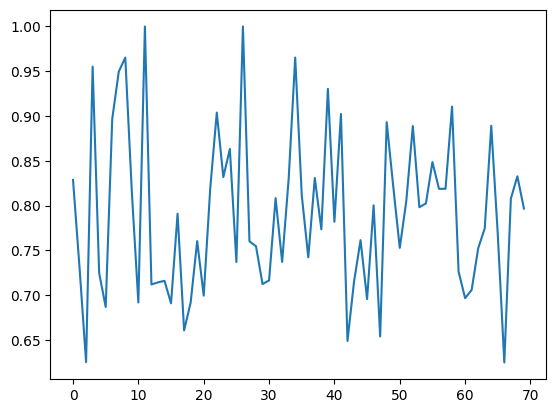

In [208]:
plt.plot(maxdists)

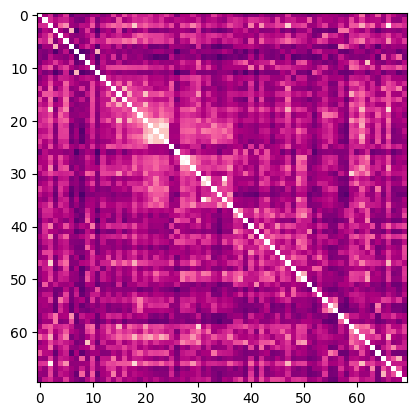

In [218]:
plt.imshow(dists1, norm="log", cmap="RdPu")

In [220]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

In [221]:
N = len(dists1)

Method:	 complete


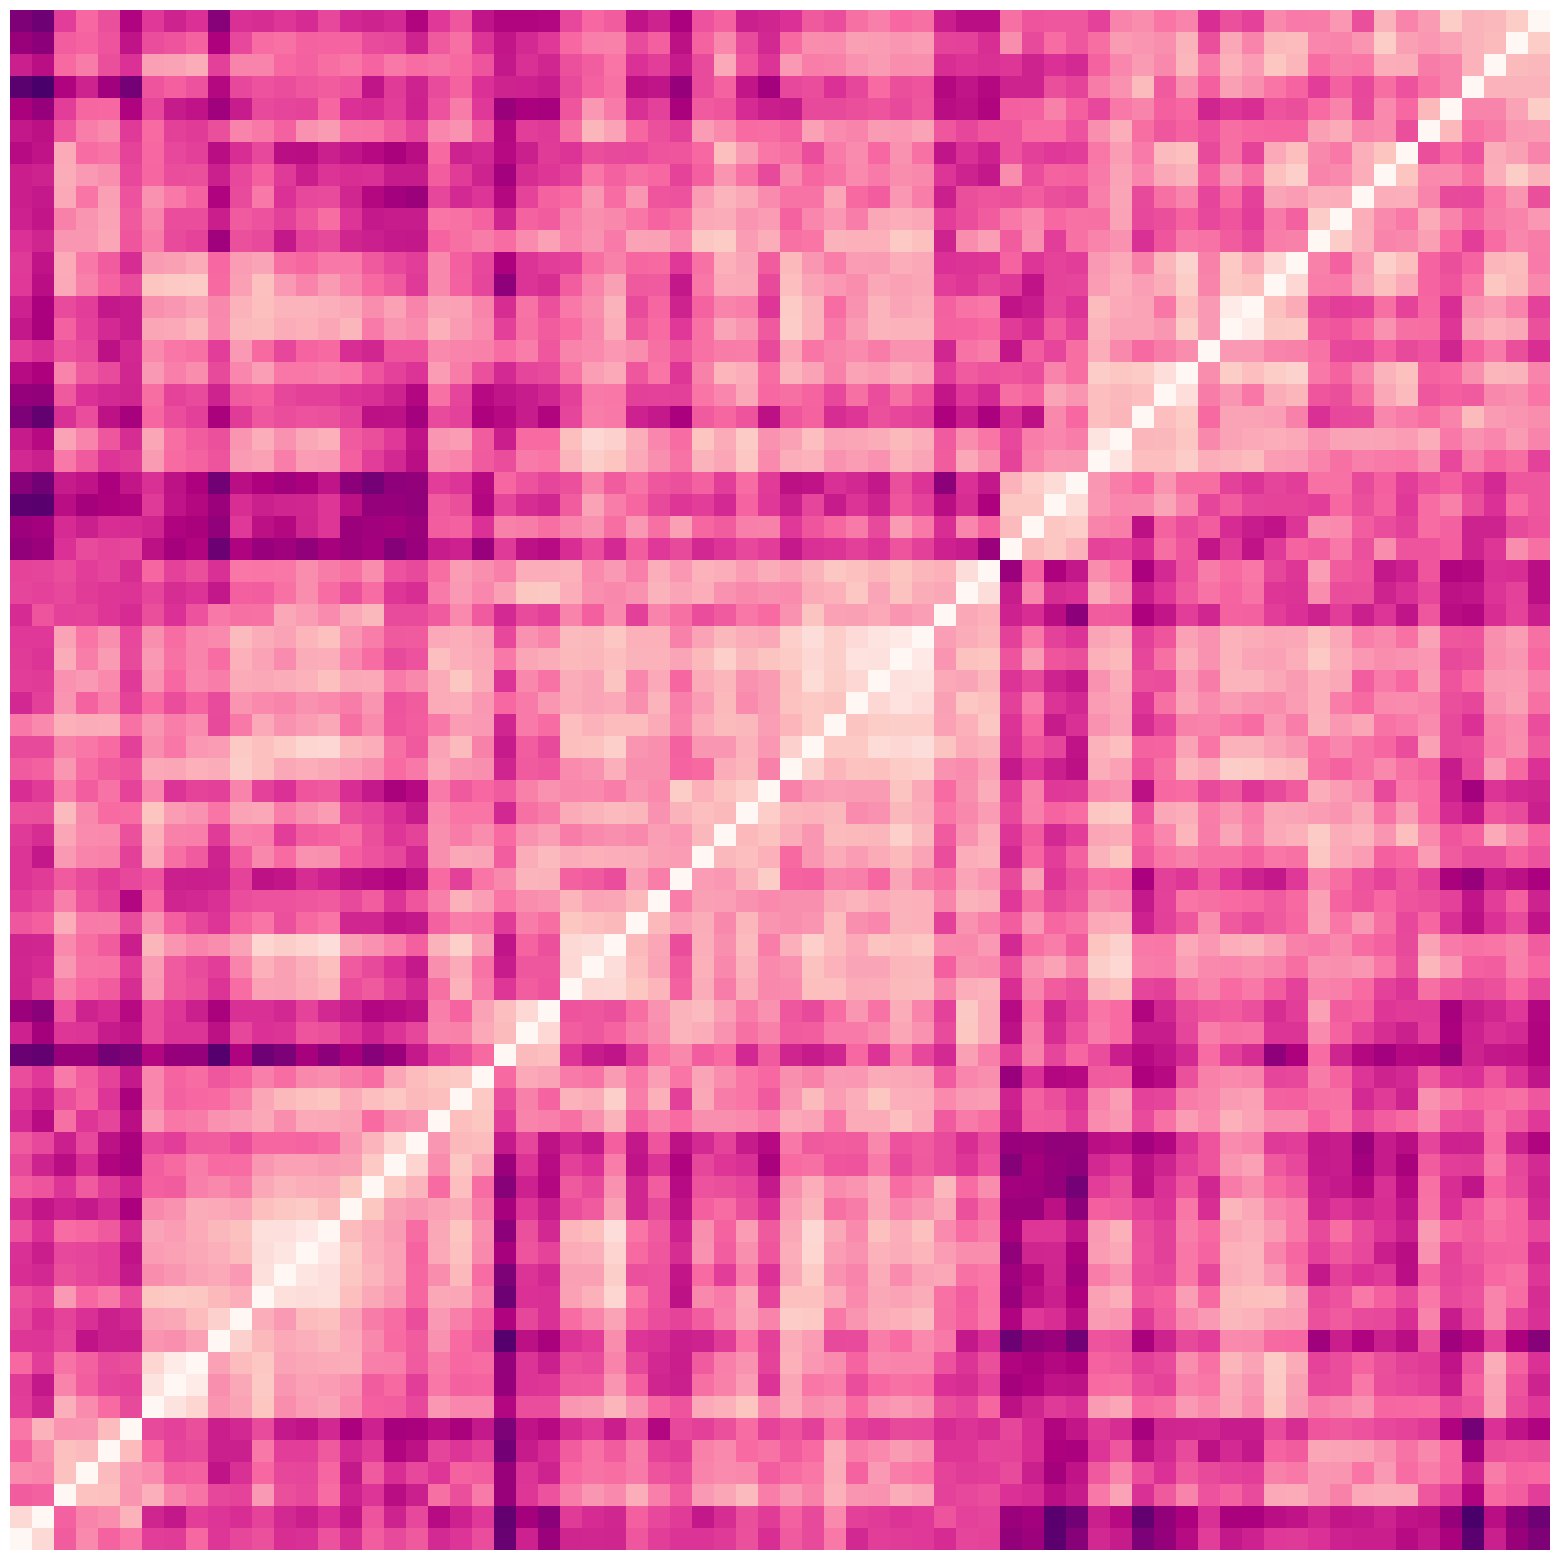

In [225]:
methods = ["complete"] #,"single","average","ward","complete"]
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dists1, method)
    plt.figure(figsize=(20,20))
    plt.pcolormesh(ordered_dist_mat, cmap="RdPu")
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.gca().set_aspect('equal')
    plt.axis("off")
    plt.show()

In [226]:
res_order

[7,
 11,
 46,
 53,
 48,
 52,
 32,
 31,
 35,
 34,
 36,
 22,
 24,
 21,
 23,
 33,
 64,
 55,
 56,
 4,
 19,
 54,
 8,
 65,
 68,
 17,
 15,
 20,
 13,
 25,
 67,
 10,
 42,
 60,
 63,
 29,
 61,
 5,
 47,
 18,
 2,
 66,
 0,
 14,
 16,
 58,
 57,
 3,
 6,
 30,
 59,
 39,
 9,
 62,
 12,
 27,
 28,
 49,
 50,
 40,
 45,
 69,
 38,
 44,
 1,
 51,
 26,
 43,
 37,
 41]

In [227]:
filelist_order = [filelist[_] for _ in res_order]

In [ ]:
for i, fname in enumerate(filelist_order):
    basefname = os.path.basename(fname)
    src = f"/home/fm/{fname}"
    dst = f"/home/fm/data/musicgen/sorted/{i:>03}-{basefname}"
    print(src)
    print(dst)
    shutil.copy(src, dst)